In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [99]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

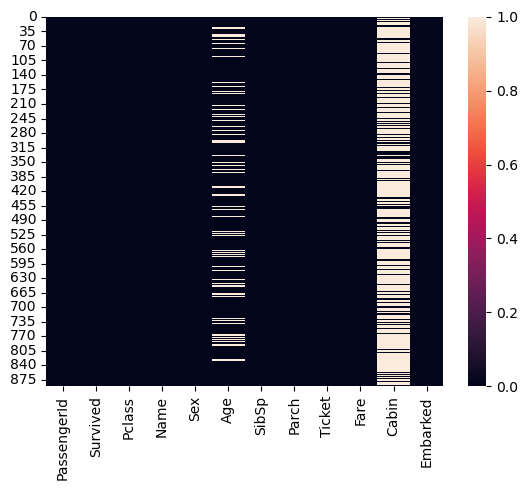

In [103]:
sns.heatmap(train.isnull())

In [104]:
def clean(x):
    x.drop(['Name','Cabin','Embarked','Ticket','Fare'],axis=1,inplace=True)
    x.Age=x.Age.fillna(x.Age.median())
    x.dropna()
    return x

In [105]:
clean(train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


In [106]:
clean(test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


In [107]:
co=train.corr()

/tmp/ipykernel_32/3967150151.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co=train.corr()


<Axes: >

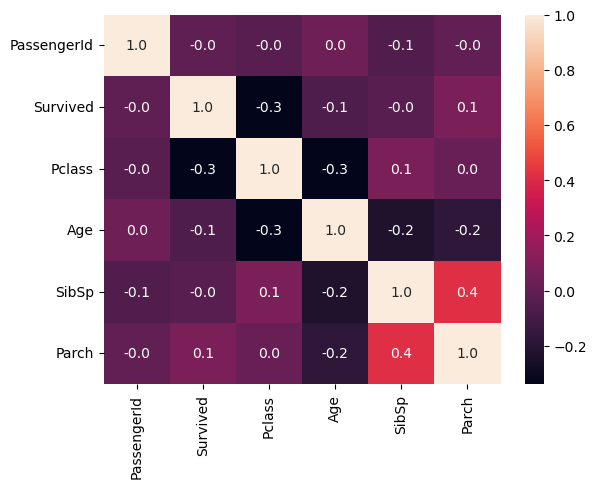

In [108]:
sns.heatmap(co,annot=True,fmt='.1f')

<Axes: xlabel='Age', ylabel='Count'>

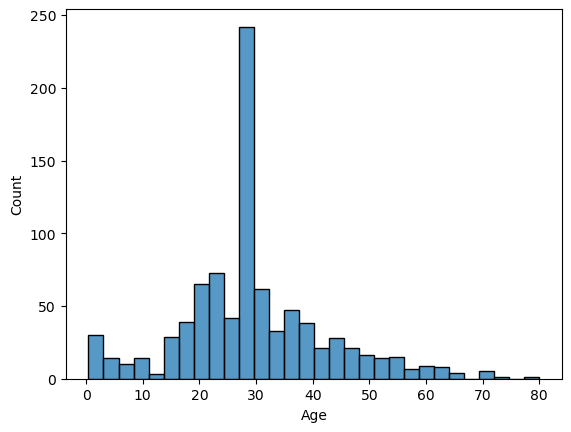

In [109]:
sns.histplot(train.Age)

In [110]:
train["Sex"].replace({'male':1,"female":0},inplace=True)

In [111]:
test["Sex"].replace({'male':1,"female":0},inplace=True)

In [112]:
x=train.drop(['Survived'],axis=1)
y=train.Survived

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8)

In [133]:
accuracies=[]
def all(model):
    model.fit(x_train,y_train)
    accuracy=model.score(x_train,y_train)
    print('Accuracy is : ',accuracy)
    accuracies.append(accuracy)

In [134]:
Algorithm=['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifie','KNeighborsClassifier',
          'GaussianNB','SVC']

In [135]:
model1=LogisticRegression(max_iter=100)
all(model1)

Accuracy is :  0.7935393258426966


In [136]:
model2=RandomForestClassifier()
all(model2)

Accuracy is :  0.9971910112359551


In [137]:
model3=GradientBoostingClassifier()
all(model3)

Accuracy is :  0.9087078651685393


In [138]:
model4=DecisionTreeClassifier()
all(model4)

Accuracy is :  1.0


In [139]:
model5= KNeighborsClassifier()
all(model5)

Accuracy is :  0.6952247191011236


In [140]:
model6=GaussianNB()
all(model6)

Accuracy is :  0.7991573033707865


In [141]:
model7=SVC()
all(model7)

Accuracy is :  0.6109550561797753


In [142]:
new=pd.DataFrame({'Algorithm':Algorithm,'Score':accuracies})
new

,Algorithm,Score
0,LogisticRegression,0.793539
1,RandomForestClassifier,0.997191
2,GradientBoostingClassifier,0.908708
3,DecisionTreeClassifie,1.000000
4,KNeighborsClassifier,0.695225
5,GaussianNB,0.799157
6,SVC,0.610955


In [144]:
last_model=DecisionTreeClassifier()
last_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [147]:
lpre=last_model.predict(test)

In [149]:
final=test.PassengerId

In [150]:
 df=pd.DataFrame({'PassengerId':final,'Survived':lpre})

In [151]:
df .to_csv('submission.csv',index=False)